In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor, Ridge)
from pandas_profiling import ProfileReport

In [4]:
df = pd.read_csv('data/final_eda_base_data.csv', index_col= 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [6]:
#df.drop(df.iloc[:, 22:40], inplace = True, axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   no_of_sales_12M_1                    10005 non-null  float64
 1   no_of_Redemption_12M_1               10005 non-null  float64
 2   no_of_sales_12M_10K                  10005 non-null  float64
 3   no_of_Redemption_12M_10K             10005 non-null  float64
 4   no_of_funds_sold_12M_1               10005 non-null  float64
 5   no_of_funds_redeemed_12M_1           10005 non-null  float64
 6   no_of_fund_sales_12M_10K             10005 non-null  float64
 7   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 8   no_of_assetclass_sold_12M_1          10005 non-null  float64
 9   no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 10  no_of_assetclass_sales_12M_10K       10005 non-null  float64
 11  no_of_assetclass_Redemption_

In [8]:
##Prepare the test train split

In [9]:
X = df.drop(['sales_2019', 'new_fund_2019'], axis=1)
y = df['sales_2019']

In [10]:
X = (X-X.mean())/X.std()

In [11]:
#draw histogram to see the distribution

In [12]:
## Decreasing the random state to 12 yeilds a better performance - .50 score on Test data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

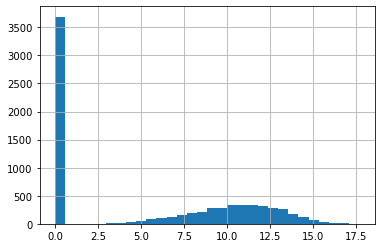

In [14]:
np.log1p(y_train).hist(bins=30);

In [15]:
pred_baseline = np.ones(len(y_train))*np.mean(y_train)

In [16]:
r2_score(y_train, pred_baseline)

0.0

In [17]:
mean_squared_error(y_train, pred_baseline, squared= False)

1185311.8594254837

In [18]:
lr_pipeline = make_pipeline(PCA(0.8), Ridge(1000))

In [19]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.8)), ('ridge', Ridge(alpha=1000))])

In [20]:
lr_pipeline.score(X_train, y_train)

0.4977529360893117

In [21]:
lr_pipeline.score(X_test, y_test)

0.4615112297044318

In [284]:
lr_pipeline.named_steps['pca'].n_components_

16

In [271]:
y_test_reg_preds = lr_pipeline.predict(X_test)

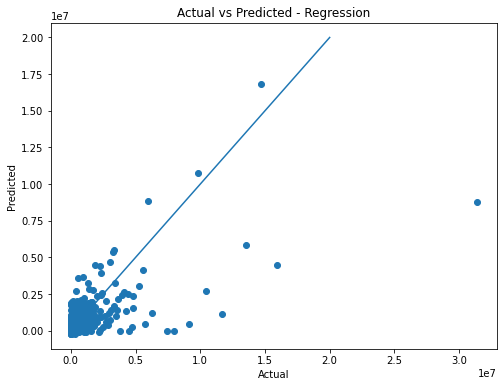

In [272]:
fig, axes = plt.subplots(figsize=(8, 6))

axes.scatter(x=y_test, y=y_test_reg_preds)

axes.plot([0, 20000000], [0,20000000])
axes.set_title("Actual vs Predicted - Regression")
axes.set_xlabel("Actual")
axes.set_ylabel("Predicted");

In [1]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 240 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 594 kB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 295 kB 10.0 MB/s eta 0:00:01


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=5e95fbc434acee30648214169b08618053467978aea18d7be239f88b811a5b77
  Stored in directory: /Users/abhinavverma/Library/Caches/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for phik: filename=phik-0.11.0-py3-none-any.whl size=599736 sha256=a3a4ac929ffd9eefa17b266615b9f8c4a8ae63cc77a0a8f1a16ef16a1c1d65a6
  Stored in directory: /Users/abhinavverma/Library/Caches/pip/wheels/15/cd/d8/d1a2da5bf20e6411649edb390d93887820168898a3659fd48d
Successfully built htmlmin phik
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
